In [72]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from quimb import *
import scipy as sp

In [3]:
Nrep=1
r=2 # local Hilbert space dim

Lab=10
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab
dims_ab = [r] *(2*Lab)

def reflected_entropy(rho,a_list):
    mu, vec= np.linalg.eigh(rho)
    mu_inds= np.argwhere(mu>1e-6)[:,0]
    psi_n=np.zeros((Nab**2,1),dtype=np.complex128)
    for i_m in mu_inds:
#     for i_m in range(len(mu)):
        psi_n += np.abs(mu[i_m])**0.5 *np.kron(vec[:,i_m],vec[:,i_m].conj())
    return entropy_subsys(psi_n, dims=dims_ab, sysa=a_list, approx_thresh=8192)

ent_before=np.zeros((Nrep,1+int(Lab/2)))
ent_after=np.zeros((Nrep,1+int(Lab/2)))

t_timer=time.time()
for i_n in range(int(Lab/2)):
    print(i_n)
    a_list=np.concatenate((np.arange(i_n+1),np.arange(i_n+1)+Lab))
    v1b=np.zeros(Nrep* r**(2*(i_n+1)))

    for i_r in range(Nrep):
#         print(i_r, end='\r')
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)
#         print(a_list)
        ent_before[i_r,i_n+1] = reflected_entropy(rho,a_list)
    
        l1 , evec1 = np.linalg.eigh(rho)
        inds = np.argwhere((Nab*l1)>1e-6)[:,0]
        mat = np.dot(evec1[:,inds],np.matrix(evec1[:,inds]).H)
        rho = mat / np.trace(mat)
        ent_after[i_r,i_n+1] = reflected_entropy(rho,a_list)
        
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

0
1
2
3
4
Finished, elapsed time = 7.19 sec


In [5]:
Nrep=10

neg_q = np.zeros((Nrep,int(Lab/2)+1))
MI = np.zeros((Nrep,int(Lab/2)+1))

dims_ab = [r] * Lab
Nc=r**Lc

L= Lab+Lc
dims = [r] * L
N = prod(dims)

t_timer=time.time()
for i_r in range(Nrep):
    psi = rand_ket(N)

    for i_n in range(int(Lab/2)):
        La= i_n+1
        Lb= Lab-i_n-1
#             neg_q[i_n+1,i_c,i_r]=negativity_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
#             neg_q[i_n+1,i_r] = negativity_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        neg_q[i_r,i_n+1] = logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        MI[i_r,i_n+1] = mutinf_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        
elapsed = time.time() - t_timer
print("Finished, quimb elapsed time = %.2f " % (elapsed)+ "sec")


Finished, quimb elapsed time = 6.32 sec


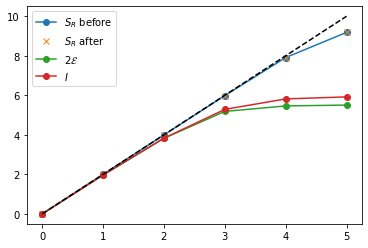

In [7]:
# ent_avg=np.mean(ent,axis=0)
neg_avg=np.mean(neg_q,axis=0)
mi_avg=np.mean(MI,axis=0)

plt.figure()
xx=np.arange(0,int(Lab/2)+1)
plt.plot(xx,ent_before.T,'o-',label=r'$ S_R $ before')
plt.plot(xx,ent_after.T,'x',label=r'$ S_R$ after')
plt.plot(xx,2*neg_avg,'o-',label=r'$ 2{\cal E} $')
plt.plot(xx,mi_avg,'o-',label=r'$ I$')
plt.plot(xx,2*xx,'k--')
plt.legend()
plt.show()

0
1
2


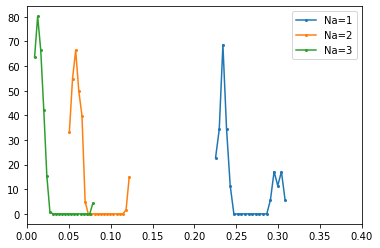

Finished, elapsed time = 4.57 sec


In [142]:
Nrep=10
r=2 # local Hilbert space dim

Lab=8
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab
dims_ab = [r] *(2*Lab)

ent=np.zeros((Nrep,1+int(Lab/2)))

t_timer=time.time()
plt.figure()
for i_n in range(int(Lab/2)-1):
# for i_n in [1]:
    print(i_n)
    a_list=np.concatenate((np.arange(i_n+1),np.arange(i_n+1)+Lab))
    Na=r**(i_n+1)
    Naa=Na**2
    v1b=np.zeros(Nrep* Naa)
    tr_aa=np.zeros(Nrep)

    for i_r in range(Nrep):
#         print(i_r, end='\r')
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)
        mu, vec= np.linalg.eigh(rho)
        mu_inds= np.argwhere(mu>1e-20)[:,0]
        psi_n=np.zeros((Nab**2,1),dtype=np.complex128)
        for i_m in mu_inds:
            psi_n += mu[i_m]**0.5 *np.kron(vec[:,i_m],vec[:,i_m].conj())

        r_aa=partial_trace(psi_n, dims=dims_ab, keep=a_list)
#         tr_aa[i_r]=np.real(np.trace(r_aa))
        v1b[i_r*Naa:(i_r+1)*Naa]=np.linalg.eigvalsh(r_aa)
#         ent[i_r,i_n+1]= entropy_subsys(psi_n, dims=dims_ab, sysa=a_list, approx_thresh=8192)
#         print(a_list)

    num_bins = 20
    n, bin_edges = np.histogram(v1b, bins=num_bins)
#     n, bin_edges = np.histogram(v1b)

#     bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    bins_center= (bin_edges[0:-1]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n,'o-',markersize=2,label='Na=%d' % (i_n+1))
#     plt.plot(tr_aa,'o')
#     print(np.sum(n)*(bin_edges[1]-bin_edges[0]))
    
plt.legend()
plt.xlim(0,0.4)
# plt.ylim(0,1)
plt.show()

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

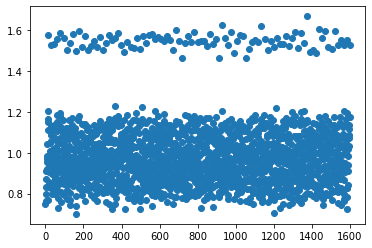

In [101]:
plt.figure()
plt.plot(v1b,'o')
plt.show()

# W state

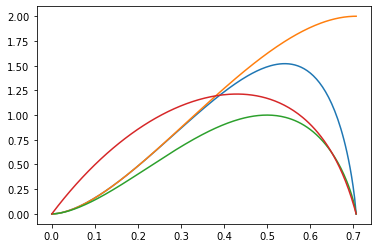

In [211]:
r = 2
Lab = 2

Nab=r**Lab
dims_ab = [r] *(2*Lab)
dims = [r]*3
a_list=[0,2]


# rho = [[1/3,0,0,0],[0,1/3,1/3,0],[0,1/3,1/3,0],[0,0,0,0]]

es= np.linspace(0,1/sqrt(2),200)
refl_ent = np.zeros(len(es))
Sa = np.zeros(len(es))
mi = np.zeros(len(es))
logneg = np.zeros(len(es))

for i_e in range(len(es)):
    e0=es[i_e]
    
    psi = e0*np.kron(np.kron([[0],[1]],[[1],[0]]),[[1],[0]])+\
          e0*np.kron(np.kron([[1],[0]],[[1],[0]]),[[0],[1]])+\
          sqrt(1-2*e0**2)*np.kron(np.kron([[1],[0]],[[0],[1]]),[[1],[0]])
#     print(psi)
    logneg[i_e] = logneg_subsys(psi, dims=dims, sysa=[0], sysb=[1])
    mi[i_e] = mutinf_subsys(psi, dims=dims, sysa=[0], sysb=[1])
    
    rho = [[e0**2,0,0,0],[0,e0**2,e0*sqrt(1-2*e0**2),0],\
           [0,e0*sqrt(1-2*e0**2),1-2*e0**2,0],[0,0,0,0]]

    mu, vec= np.linalg.eigh(rho)
    psi_n=np.zeros((Nab**2,1),dtype=np.complex128)
    for i_m in range(len(mu)):
        psi_n += np.reshape(np.abs(mu[i_m])**0.5 *np.kron(vec[:,i_m],vec[:,i_m].conj()),[Nab**2,1])
    # print(psi_n)
    rAA=partial_trace(psi_n,dims_ab, keep = a_list)
#     print(rAA)
#     print(np.linalg.eigvalsh(rAA))
    refl_ent[i_e]=entropy_subsys(psi_n, dims=dims_ab, sysa=a_list, approx_thresh=8192)
    Sa[i_e]=entropy_subsys(psi, dims=dims, sysa=[0])
       
plt.plot(es,refl_ent)
plt.plot(es,2*Sa)
plt.plot(es,mi)
plt.plot(es,2*logneg)

In [198]:
np.kron(np.kron([[0],[1]],[[1],[0]]),[[1],[0]])
# rand_ket(4)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

TypeError: _shape_dispatcher() missing 1 required positional argument: 'a'

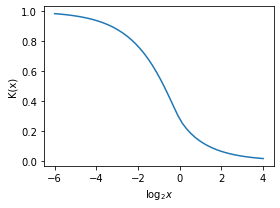

In [120]:
def K(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>= 1:
            y[i] = 1- sp.special.hyp2f1(-0.5,0.5,2,1/x[i])**2
        else:
            y[i] = 1- x[i]*sp.special.hyp2f1(-0.5,0.5,2,x[i])**2
    return y

# xx = np.logspace(-2,1,200)
# xx1 = np.linspace(0.1,4,200)
# xx0 = np.logspace(-4,-1,2000)
# xx = np.concatenate((xx0,xx1))
xx = 2 ** np.linspace(-6,4)
plt.figure(figsize=(4,3))
plt.plot(np.log2(xx),K(xx),'-')
# plt.plot(xx[1::],np.diff(K(xx))/np.diff(xx))
# plt.xscale("log")
plt.xlabel(r'$\log_2 x$')
plt.ylabel('K(x)')
plt.tight_layout()
plt.savefig('refl_ent_figs/K.pdf')
plt.show()

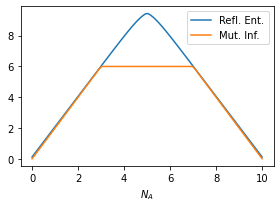

In [164]:
def Srefl(a,b,c):
    kv =  K([c/(a*b)])
    z0 = -kv*np.log2(kv) -(1-kv)*np.log2(1-kv)
    if a < b:
        return z0+kv* (2*np.log2(a)-a**2/(2*b**2)) 
    else:
        return z0+kv* (2*np.log2(b)-b**2/(2*a**2)) 

def mut_inf(a,b,c):
    if c>(a*b):
        return 0
    else:
        if a>(b*c):
            return 2*np.log2(b)
        elif b >(a*c):
            return 2*np.log2(a)
        else:
            return np.log2(a*b/c)


N = 14
Nab = 10
Nc = N- Nab

r_ab= np.linspace(0,1,100)
Sr= np.zeros(len(r_ab))
mi= np.zeros(len(r_ab))
for i_ab in range(len(r_ab)):
    a = 2**(r_ab[i_ab]*Nab)
    b = 2**((1-r_ab[i_ab])*Nab)
    c = 2**(Nc)
    Sr[i_ab]= Srefl(a,b,c)
    mi[i_ab]= mut_inf(a,b,c)
    
plt.figure(figsize=(4,3))
plt.plot(r_ab*Nab,Sr,label='Refl. Ent.')
plt.plot(r_ab*Nab,mi,label='Mut. Inf.')
plt.xlabel(r'$N_A$')
plt.legend()
plt.tight_layout()
# plt.plot([0,int(Nab/2)],[0,Nab],"k--")

plt.savefig('refl_ent_figs/Sr_vs_NA_fixed_NC.pdf')
plt.show()

    

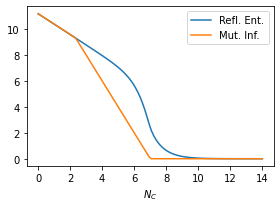

In [167]:

r_ab=0.4
r_c= np.linspace(0,1,100)
Sr= np.zeros(len(r_c))
mi= np.zeros(len(r_c))
for i_c in range(len(r_c)):
    Nab = (1-r_c[i_c])*N
    a = 2**(r_ab*Nab)
    b = 2**((1-r_ab)*Nab)
    c = 2**(r_c[i_c]*N)
    Sr[i_c]= Srefl(a,b,c)
    mi[i_c]= mut_inf(a,b,c)
    
plt.figure(figsize=(4,3))
plt.plot(r_c*N,Sr,label='Refl. Ent.')
plt.plot(r_c*N,mi,label='Mut. Inf.')
plt.xlabel(r'$N_C$')
plt.legend()
plt.tight_layout()
# plt.plot([0,int(Nab/2)],[0,Nab],"k--")

plt.savefig('refl_ent_figs/Sr_vs_NC_fixed_N.pdf')
plt.show()


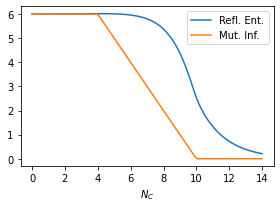

In [162]:

r_ab=0.3
Nab=10
Ncs= np.linspace(0,14,100)
Sr= np.zeros(len(Ncs))
mi= np.zeros(len(Ncs))
for i_c in range(len(Ncs)):
    a = 2**(r_ab*Nab)
    b = 2**((1-r_ab)*Nab)
    c = 2**(Ncs[i_c])
    Sr[i_c]= Srefl(a,b,c)
    mi[i_c]= mut_inf(a,b,c)
    
plt.figure(figsize=(4,3))
plt.plot(Ncs,Sr,label='Refl. Ent.')
plt.plot(Ncs,mi,label='Mut. Inf.')
plt.xlabel(r'$N_C$')
plt.legend()
plt.tight_layout()
# plt.plot([0,int(Nab/2)],[0,Nab],"k--")

plt.savefig('refl_ent_figs/Sr_vs_NC.pdf')
plt.show()


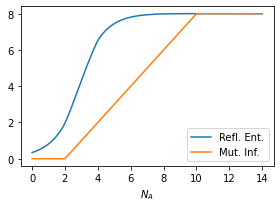

In [166]:
Nb=4
Nc=6
Nas= np.linspace(0,14,100)
Sr= np.zeros(len(Nas))
mi= np.zeros(len(Nas))
for i_a in range(len(Nas)):
    a = 2**(Nas[i_a])
    b = 2**Nb
    c = 2**Nc
    Sr[i_a]= Srefl(a,b,c)
    mi[i_a]= mut_inf(a,b,c)
    
plt.figure(figsize=(4,3))
plt.plot(Nas,Sr,label='Refl. Ent.')
plt.plot(Nas,mi,label='Mut. Inf.')
plt.xlabel(r'$N_A$')
plt.legend()
plt.tight_layout()
# plt.plot(Nas,2*Nas,"k--")
# plt.ylim(0,2*Nb+1)

plt.savefig('refl_ent_figs/Sr_vs_NA.pdf')
plt.show()
